
Quality class distribution:
quality_class
Start    162145
Stub      91920
C         74983
B         29768
List      13161
GA         5934
FA         1582
FL          320
A           113
Name: count, dtype: int64

Average metrics by quality:
                page_length  num_references   num_links  num_sections
quality_class                                                        
A              60096.513274       97.150442  386.106195     17.619469
B              61135.934527       96.629770  422.763303     21.023918
C              33138.785378       47.859635  285.053265     14.689956
FA             89048.490518      142.502528  514.546144     21.720607
FL             58989.325000       87.653125  370.571875     11.287500
GA             64000.726828      115.955848  395.998146     17.878328
List           29490.591900       29.685206  368.687866     13.749031
Start          14064.614672       17.696901  179.280940      8.245743
Stub            5878.574434        6.294713  143.609748   

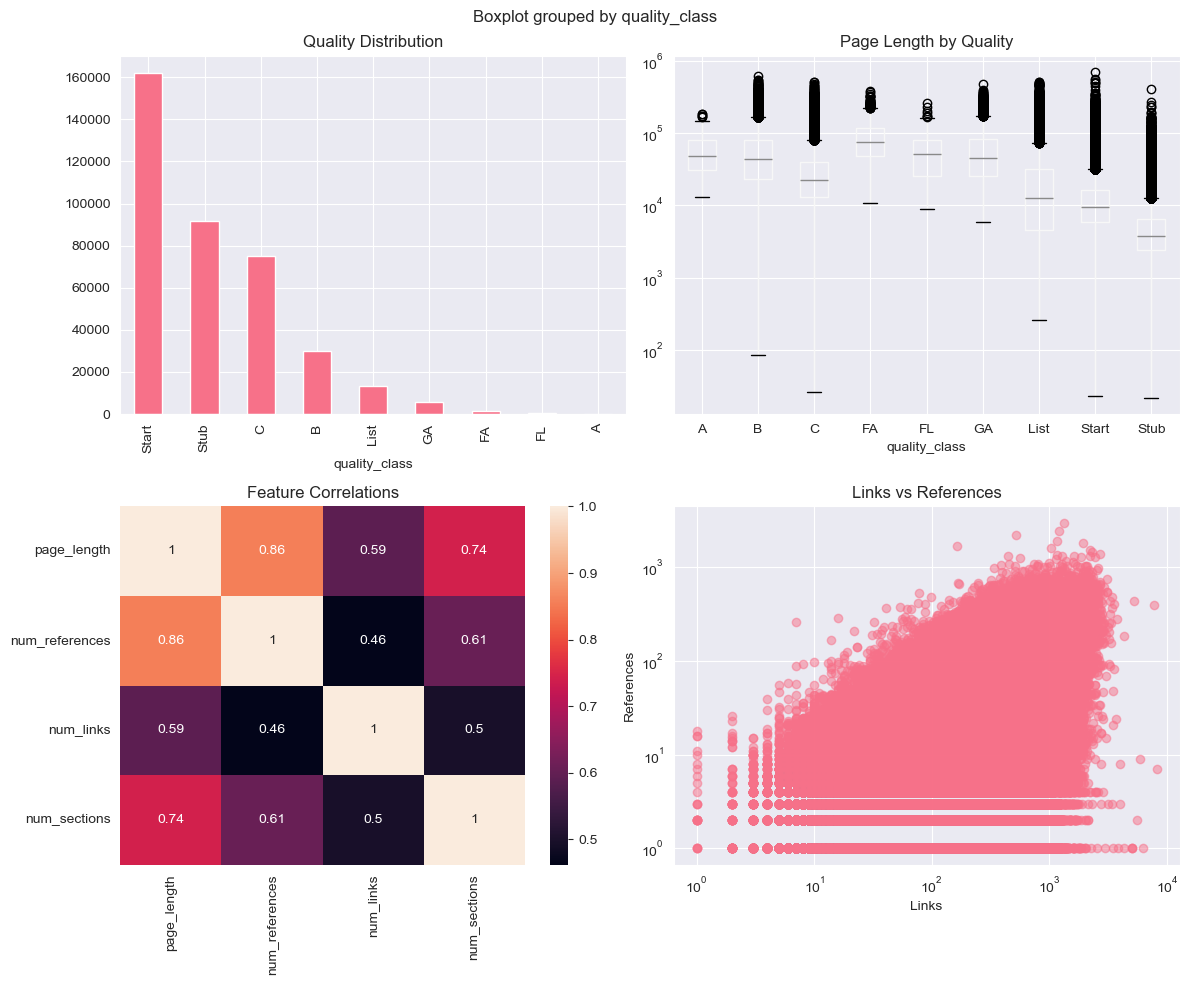


Network structure:
Total edges: 28,541,209
Unique sources: 379,766
Unique targets: 379,365

Degree statistics:
Max out-degree: 2669
Max in-degree: 76606
Avg out-degree: 75.2
Avg in-degree: 75.2

Class imbalance:
High quality (FA/FL/GA): 7,836 (2.1%)
Low quality (Stub/Start): 254,065 (66.9%)

Protection status:
protection_status
unprotected        371976
semi_protected       4471
protected            3475
fully_protected         4
Name: count, dtype: int64

Top 5 most viewed articles:
YouTube (B): 66,914,887
J. Robert Oppenheimer (FA): 33,911,979
Facebook (B): 29,681,143
Cricket World Cup (B): 26,373,304
ChatGPT (B): 24,718,955

Edit activity summary:
       edits_all_types     edits_user  edits_anonymous  edits_group_bot  \
count    379926.000000  379926.000000    379926.000000    379926.000000   
mean         29.624956      21.759443         5.428223         2.434866   
std          95.997242      81.759221        19.813963         4.255601   
min           0.000000       0.000000   

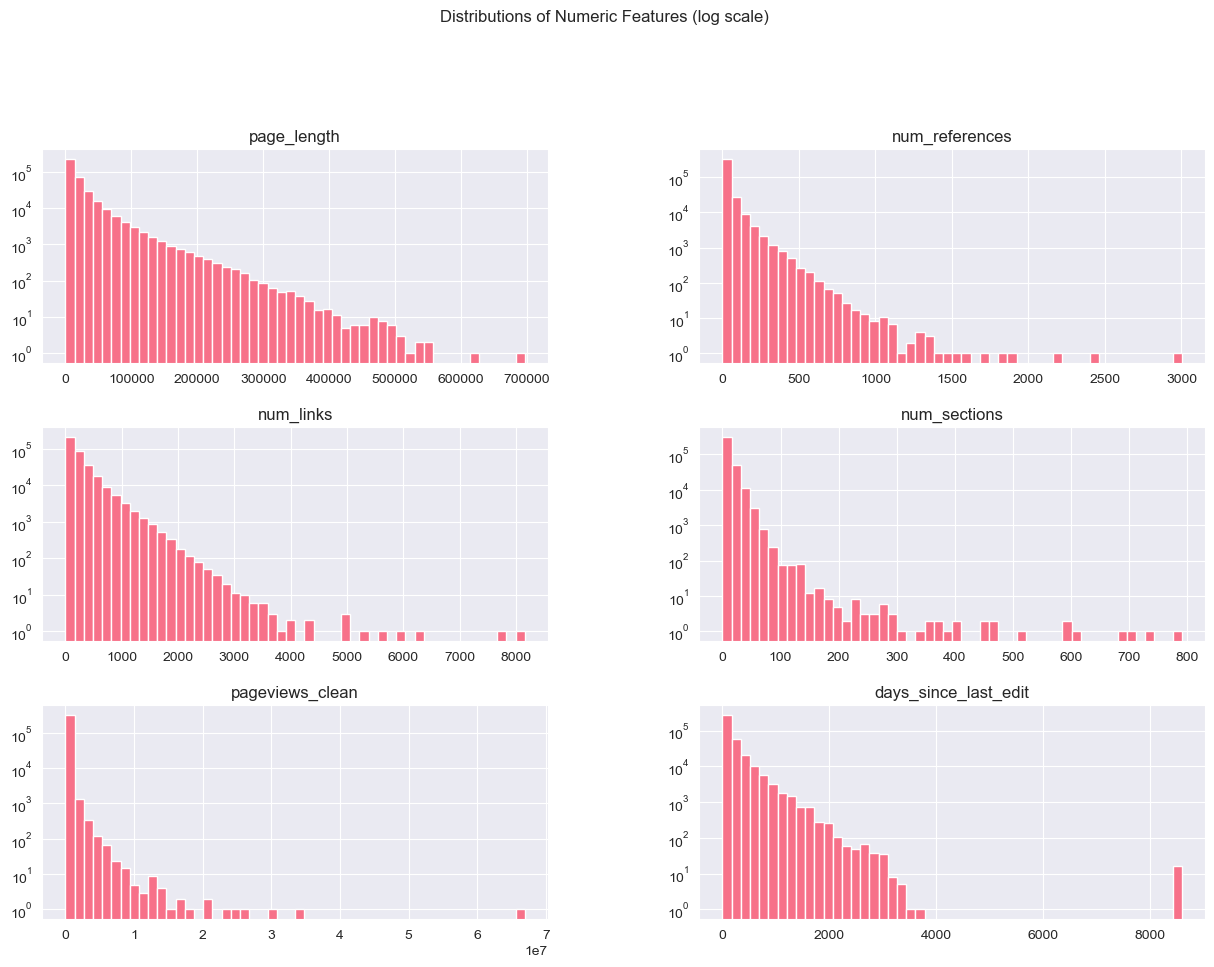

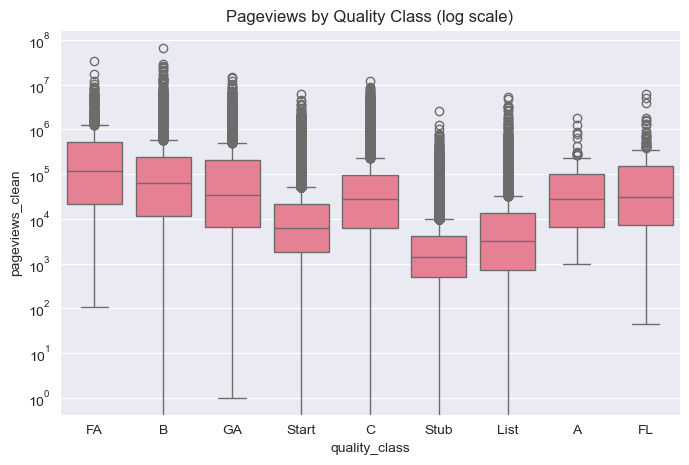

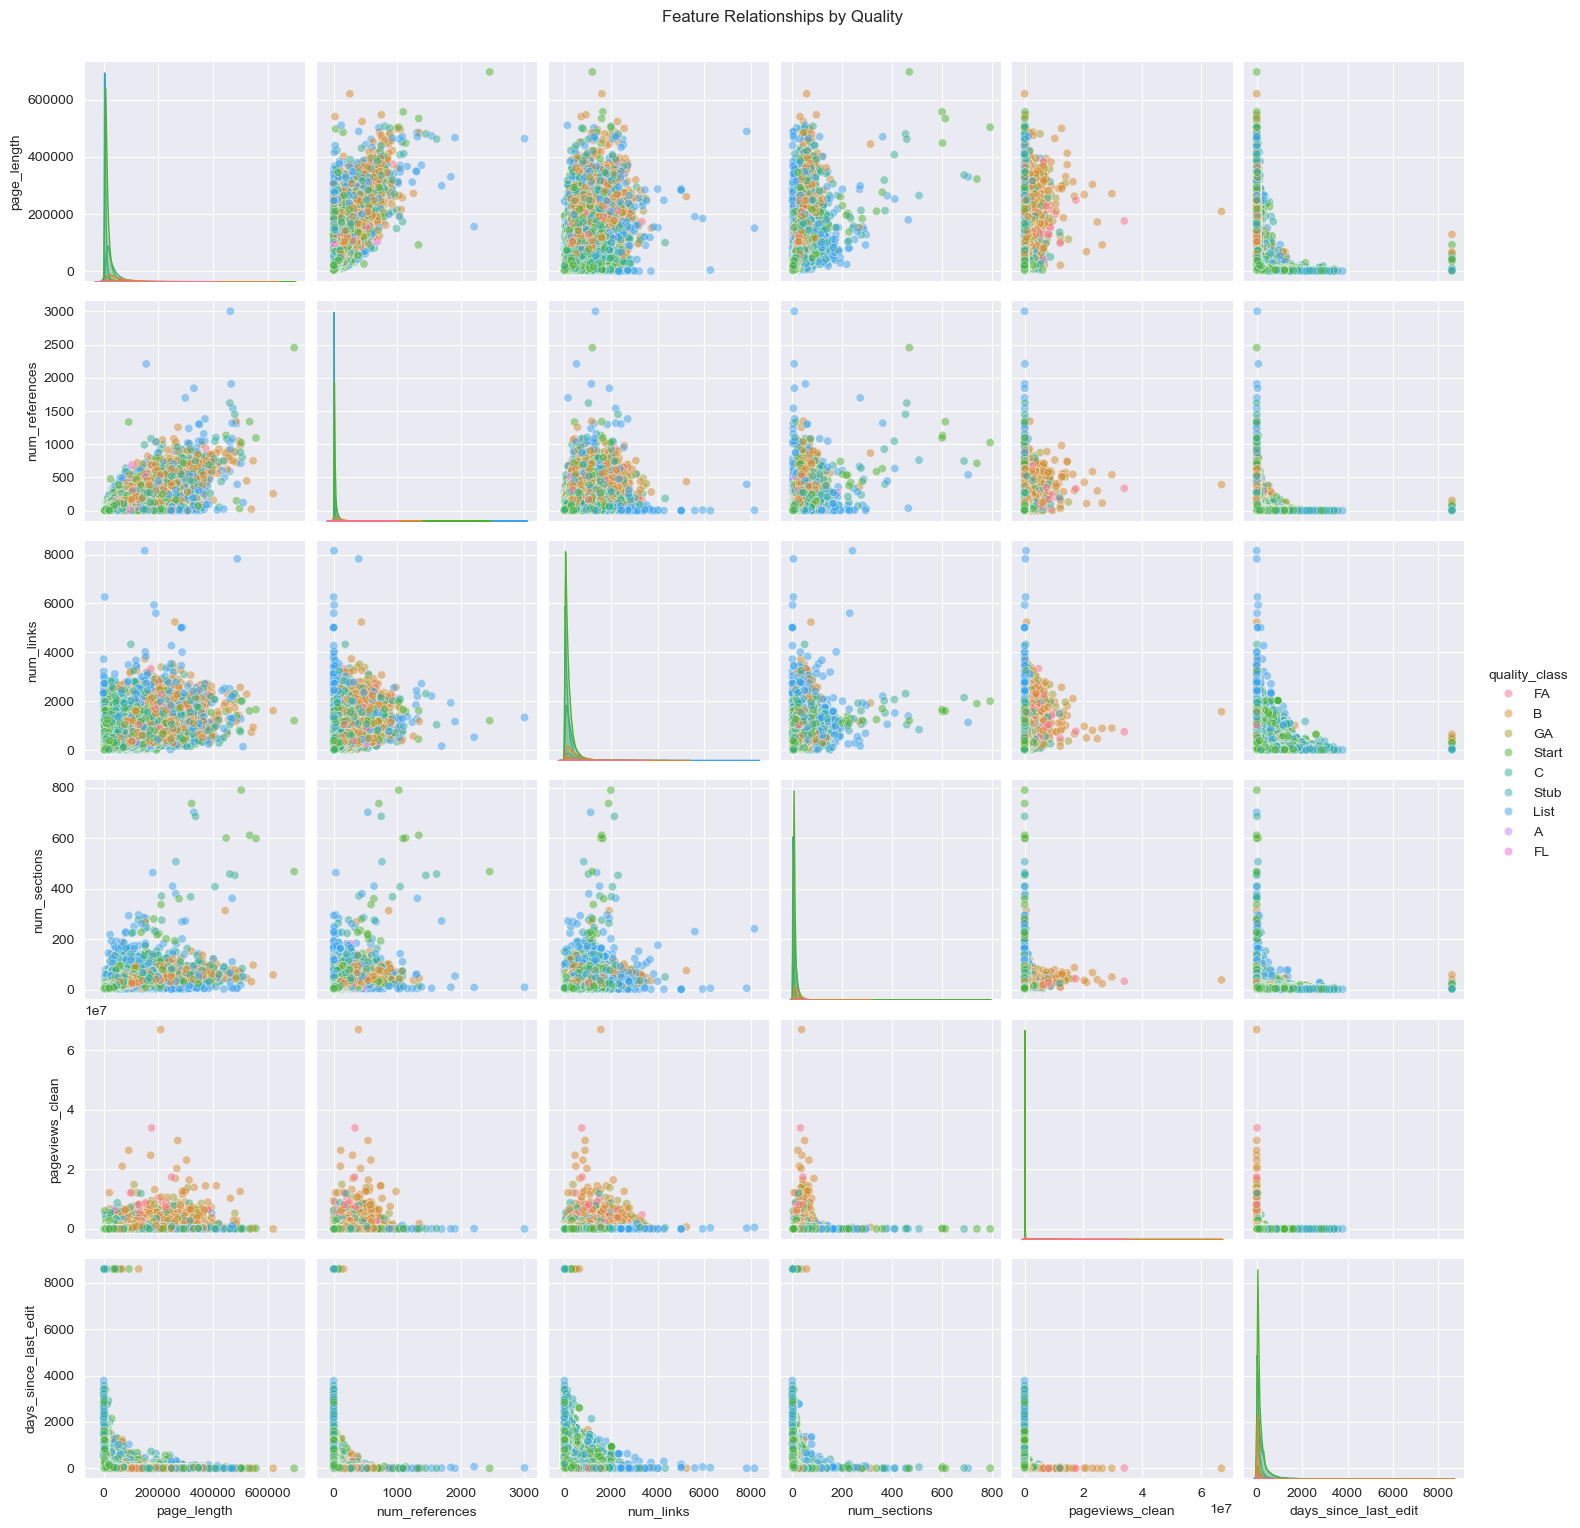

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df_articles = pd.read_csv('data/cleaned_articles_final.csv')
df_edges = pd.read_csv('data/cleaned_edges_final.csv')

# Quality distribution (target)
print("\nQuality class distribution:")
print(df_articles['quality_class'].value_counts())

# Key statistics by quality
numerical_cols = ['page_length', 'num_references', 'num_links', 'num_sections']
quality_stats = df_articles.groupby('quality_class')[numerical_cols].mean()
print("\nAverage metrics by quality:")
print(quality_stats)


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Quality distribution
df_articles['quality_class'].value_counts().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Quality Distribution')

# Page length by quality
df_articles.boxplot(column='page_length', by='quality_class', ax=axes[0,1])
axes[0,1].set_title('Page Length by Quality')
axes[0,1].set_yscale('log')

# Correlation heatmap
corr = df_articles[numerical_cols].corr()
sns.heatmap(corr, annot=True, ax=axes[1,0])
axes[1,0].set_title('Feature Correlations')

# Links vs References
axes[1,1].scatter(df_articles['num_links'], df_articles['num_references'], alpha=0.5)
axes[1,1].set_xlabel('Links')
axes[1,1].set_ylabel('References')
axes[1,1].set_title('Links vs References')
axes[1,1].set_xscale('log')
axes[1,1].set_yscale('log')

plt.tight_layout()
plt.show()

# Network basics
print(f"\nNetwork structure:")
print(f"Total edges: {len(df_edges):,}")
print(f"Unique sources: {df_edges['source'].nunique():,}")
print(f"Unique targets: {df_edges['target'].nunique():,}")

# Degree analysis
out_degrees = df_edges['source'].value_counts()
in_degrees = df_edges['target'].value_counts()

print(f"\nDegree statistics:")
print(f"Max out-degree: {out_degrees.max()}")
print(f"Max in-degree: {in_degrees.max()}")
print(f"Avg out-degree: {out_degrees.mean():.1f}")
print(f"Avg in-degree: {in_degrees.mean():.1f}")

# Class imbalance analysis
total = len(df_articles)
high_quality = df_articles['quality_class'].isin(['FA', 'FL', 'GA']).sum()
low_quality = df_articles['quality_class'].isin(['Stub', 'Start']).sum()

print(f"\nClass imbalance:")
print(f"High quality (FA/FL/GA): {high_quality:,} ({high_quality/total*100:.1f}%)")
print(f"Low quality (Stub/Start): {low_quality:,} ({low_quality/total*100:.1f}%)")

# Protection status if available
if 'protection_status' in df_articles.columns:
    print("\nProtection status:")
    print(df_articles['protection_status'].value_counts())

# Top articles by pageviews if available
if 'pageviews_Jul2023Jul2024' in df_articles.columns:
    df_articles['pageviews_clean'] = pd.to_numeric(df_articles['pageviews_Jul2023Jul2024'], errors='coerce')
    print("\nTop 5 most viewed articles:")
    top_viewed = df_articles.nlargest(5, 'pageviews_clean')[['article', 'quality_class', 'pageviews_clean']]
    for _, row in top_viewed.iterrows():
        print(f"{row['article']} ({row['quality_class']}): {row['pageviews_clean']:,.0f}")

# Edit activity if available
edit_cols = [col for col in df_articles.columns if 'edits_' in col]
if edit_cols:
    print(f"\nEdit activity summary:")
    print(df_articles[edit_cols].describe())


# Numeric distributions
numeric_cols = ['page_length', 'num_references', 'num_links', 'num_sections', 'pageviews_clean', 'days_since_last_edit']
df_articles[numeric_cols].hist(bins=50, figsize=(15, 10), log=True)
plt.suptitle('Distributions of Numeric Features (log scale)', y=1.02)
plt.show()

# Pageviews vs quality (log scale)
plt.figure(figsize=(8, 5))
sns.boxplot(x='quality_class', y='pageviews_clean', data=df_articles)
plt.yscale('log')
plt.title('Pageviews by Quality Class (log scale)')
plt.show()


# Pairplot
sns.pairplot(df_articles[numeric_cols + ['quality_class']], hue='quality_class',
             plot_kws={'alpha':0.5}, diag_kind='kde')
plt.suptitle('Feature Relationships by Quality', y=1.02)
plt.show()